# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Parte-numérica" data-toc-modified-id="Parte-numérica-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte numérica</a></div><div class="lev1 toc-item"><a href="#Parte-experimental" data-toc-modified-id="Parte-experimental-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parte experimental</a></div><div class="lev1 toc-item"><a href="#Comparación" data-toc-modified-id="Comparación-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparación</a></div><div class="lev1 toc-item"><a href="#Ajuste" data-toc-modified-id="Ajuste-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ajuste</a></div><div class="lev2 toc-item"><a href="#Definición-de-funcion-de-ajuste" data-toc-modified-id="Definición-de-funcion-de-ajuste-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definición de funcion de ajuste</a></div>

# Teorico, ley de Malus, a ver si reproducimos el que hicimos

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.

We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

\begin{equation}
P_L(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

After this formalism, we pass to Mueller using Jones-Mueller Transformation

**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja P1 en un ángulo fijo.

1. Se hace un doble bucle for para R2 y P4.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2.
1. Parámetros de R2



In [1]:
from __future__ import print_function, division

# configuration
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting, plot_experiment_residuals_1D
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

from pprint import  pprint
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Parte experimental

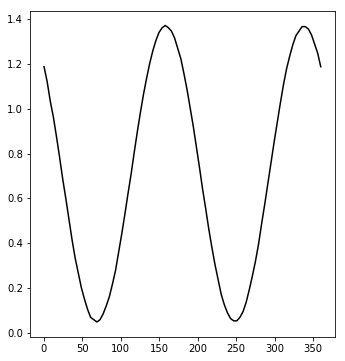

In [5]:
data_1=np.load('step3_P1_parameters_2018-03-14.npy')
angles=data_1[:,0]*degrees
I_experimental=data_1[:,1]

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(angles/degrees,I_experimental,'k')

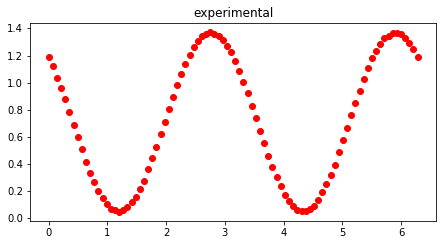

In [6]:
plot_experiment_residuals_1D(x=angles, y=I_experimental, y_fitting=None, title='experimental')

## Parte numérica

In [7]:
#Light source: circular polarization
param_u0, u0 =get_light_parameters()
[amplitude, angle, phase]=param_u0
print(u0)

[[ 4.2206]
 [-0.0243]
 [ 0.0091]
 [ 4.2205]]


In [46]:
pol_dicts=get_polarimeter_parameters(kind='exp')
#real, ideal, exp

pprint(pol_dicts)

[{'p0': 0.1329706, 'p1': 0.9692239, 'theta_axis': 0.1168707373720443},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0},
 {'a': 1.0, 'b': 1.0, 'delta': 1.5707963267948966, 'theta_axis': 0.0},
 {'p0': 0.1329706, 'p1': 0.9692239, 'theta_axis': 2.762681672981824}]


In [69]:
# Use polarimeter parameters to generate Mueller Matrices
angles_polarizers=[pol_dicts[0]['theta_axis'],pol_dicts[2]['theta_axis'],
        pol_dicts[2]['theta_axis'],pol_dicts[3]['theta_axis']]
P = polarimeter_matrices(pol_dicts, angles=angles_polarizers)
for i in range(len(P)):
    pprint(P[i])

matrix([[ 0.4785,  0.4483,  0.1067,  0.    ],
        [ 0.4483,  0.4598,  0.0788,  0.    ],
        [ 0.1067,  0.0788,  0.1476,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])
matrix([[ 0.4785,  0.3347, -0.3168,  0.    ],
        [ 0.3347,  0.3133, -0.1746,  0.    ],
        [-0.3168, -0.1746,  0.2941,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]])


In [70]:
is_polarizer=[True,False, False,True]
param_u0, u0 =get_light_parameters()

intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer, 
                                    angles=[0,0,0,0], u0=u0)
print(intensity_0)
print(M)
intensity_0, M = polarimeter_matrix(P, is_present=is_polarizer,
                                    angles=[0,0,0,90*degrees], u0=u0)
print(intensity_0)
print(M)

1.44910685459
[[ 0.3453  0.3435  0.0307  0.    ]
 [ 0.282   0.2804  0.0346  0.    ]
 [-0.1985 -0.1991 -0.0042  0.    ]
 [ 0.      0.      0.      0.0166]]
0.474401076512
[[ 0.1127  0.0856  0.0715  0.    ]
 [-0.0383 -0.0198 -0.0368  0.    ]
 [ 0.1047  0.0849  0.0635  0.    ]
 [ 0.      0.      0.      0.0166]]


In [71]:
I_numerica=sp.zeros_like(angles, dtype=float)

In [72]:
print(P)

(matrix([[ 0.4785,  0.4483,  0.1067,  0.    ],
        [ 0.4483,  0.4598,  0.0788,  0.    ],
        [ 0.1067,  0.0788,  0.1476,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]]), matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]]), matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]]), matrix([[ 0.4785,  0.3347, -0.3168,  0.    ],
        [ 0.3347,  0.3133, -0.1746,  0.    ],
        [-0.3168, -0.1746,  0.2941,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.1289]]))


In [73]:
for i4, angle_4 in enumerate(angles):
    I_numerica[i4], _ = polarimeter_matrix(P, is_present=is_polarizer, angles=[0,0,0,angle_4], u0=u0)

In [74]:
polarimeter_matrix(P, is_present=is_polarizer, angles=[0,0,0,186.7*degrees], u0=u0)

(1.6088806824743731, matrix([[ 0.3833,  0.3798,  0.0485,  0.    ],
         [ 0.3501,  0.3467,  0.051 ,  0.    ],
         [-0.1551, -0.156 , -0.0046,  0.    ],
         [ 0.    ,  0.    ,  0.    ,  0.0166]]))

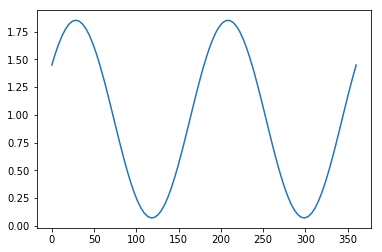

In [75]:
plt.figure()
plt.plot(angles/degrees,I_numerica)

# Comparación
Esta comparación no es buena, pues no está optimizada.

El siguiente paso es optimizar y obtener los parámetros

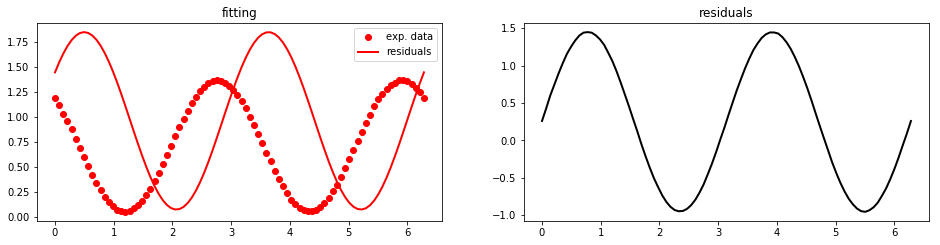

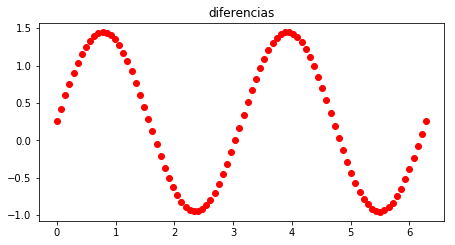

In [76]:
diferencias=I_numerica-I_experimental
plot_experiment_residuals_1D(x=angles, y=I_experimental, y_fitting=I_numerica, title='fitting')
plot_experiment_residuals_1D(x=angles, y=diferencias, y_fitting=None, title='diferencias')

# Ajuste

Definimos una función que genera la distribución de intensidad, que es la que intentamos optimizar

## Definición de funcion de ajuste

In [77]:
def polarimeter_matrices_parameters(par):
    """Se introducen los parámetros que definen las matrices y devuelve las matrices
    
    p0,p1,a,b, delta, theta_1, theta_4=par
    
    """
    p0,p1, theta_4=par
    pol1 = dict(theta_axis=6*degrees, p0=p0, p1=p1)
    pol2 = dict(theta_axis=0, a=1, b=1, delta=0)
    pol3 = dict(theta_axis=0, a=1, b=1, delta=0)
    pol4 = dict(theta_axis=theta_4, p0=p0, p1=p1)
    
    pol_param=[pol1, pol2, pol3, pol4]
    P = polarimeter_matrices(pol_param, angles=None)
    return P

In [78]:
def polarimeter_behaviour(par):
    param_u0, u0 =get_light_parameters()
    is_polarizer=[True, False, False, True]
    P=polarimeter_matrices_parameters(par)
    Intensities=sp.zeros_like(angles, dtype=float)

    for i4, angle_4 in enumerate(angles):
        Intensities[i4], _ = polarimeter_matrix(P, is_present=is_polarizer, 
                                                 angles=[6.6962*degrees,0,0,angle_4], u0=u0)
    return Intensities

In [79]:
# par=[0,1,158.29*degrees]
# example=polarimeter_behaviour(par)
# plot_experiment_residuals_1D(angles/degrees, example, None)

In [80]:
def err_func(par_error):
  
    I_theory=polarimeter_behaviour(par_error)
    return abs(I_theory -I_experimental ).flatten()

has_example=True
if has_example:
    par_example=[0.132970683165,0.969223930738, 45*degrees]
    error=err_func(par_example)
    print(error.mean())

0.288841955107


In [81]:
par=[0,1,158.29*degrees]
angulos=sp.linspace(0,2*pi,50)
errores=sp.zeros_like(angles, dtype=float)
for i, angle_2 in enumerate(angles):
    par[2]=angle_2
    errores[i]=err_func(par).mean()

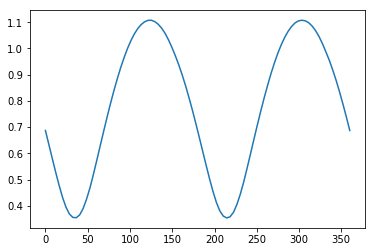

In [82]:
plt.figure()
plt.plot(angles/degrees, errores)

In [83]:
# p0,p1,a,b, delta, theta_2, theta_4
params_ini=[0.1329706, 0.9692239,  158.2936*degrees ]


params_optim, success = optimize.leastsq(err_func, params_ini)
print(params_optim[0:2])
print((params_optim[2:])*180/sp.pi)

[ 0.1231  0.8986]
[ 214.4677]


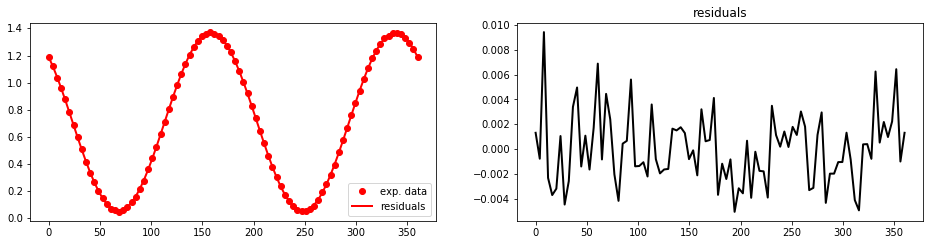

0.00228100239163


In [84]:
Intensities_fitting = polarimeter_behaviour(params_optim)
residuals= Intensities_fitting-I_experimental
plot_experiment_residuals_1D(angles/degrees, I_experimental, Intensities_fitting)    
print(abs(residuals).mean())

In [25]:
207-158

49